## 資料集資訊
### Source: Kaggle 
### Dataset: Pet Store Records 2020
<https://www.kaggle.com/datasets/ippudkiippude/pet-store-records-2020/data>
### Size: 48.91 KB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#讀取資料
pet_store = pd.read_csv('pet_store_records_2020.csv')
pet_store.head(10)

,product_id,product_category,sales,price,VAP,vendor_id,country,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123,7293,0,VC_1605,Vietnam,small,fish,7,1
1,4567,Toys,61,9304,1,VC_1132,India,small,cat,10,0
2,4237,Toys,218,8180,0,VC_802,India,small,hamster,6,0
3,4364,Snack,69,18559,1,VC_929,India,large,dog,1,1
4,4184,Supplements,138,10283,1,VC_749,India,large,dog,10,0
5,4609,Bedding,183,3969,1,VC_1174,India,large,cat,10,0
6,4380,Toys,79,13519,1,VC_945,India,extra_small,dog,8,0
7,4389,Bedding,205,13078,0,VC_954,India,large,cat,9,0
8,4697,Supplements,116,13701,0,VC_1262,Belgium,small,cat,10,0
9,4238,Medicine,141,19082,1,VC_803,India,medium,dog,10,1


# 1. 銷售量多的商品是否價格較低？

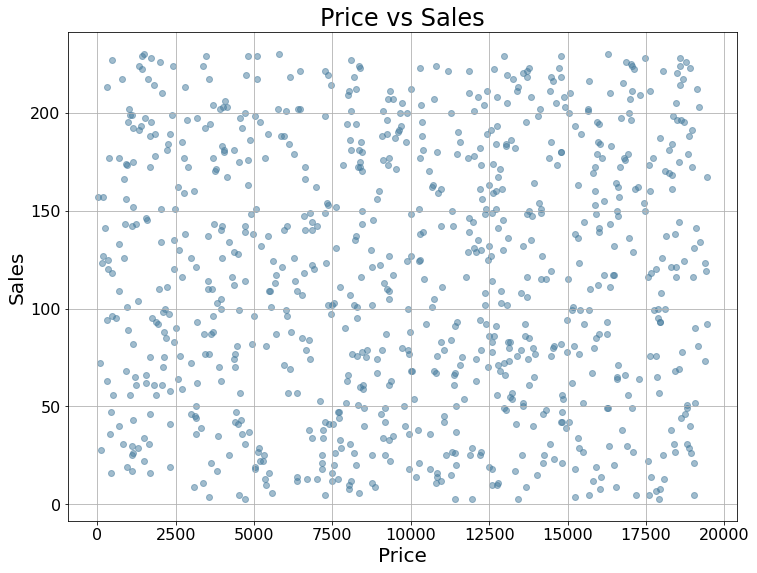

In [3]:
# 用散佈圖觀察銷售量和價錢之間的關係

# 提取價格和銷售量的資料
prices = pet_store['price']
sales = pet_store['sales']

# 繪製散佈圖
plt.figure(figsize=(12, 9))
plt.scatter(prices, sales, alpha=0.5, color = '#457b9d')
plt.title('Price vs Sales', fontsize=24)
plt.xlabel('Price', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

### 由散佈圖的散佈情況，可以看出價錢高低與銷售量並沒有明顯的相關性，因此產品銷量與價錢並無關係。

# 2. 哪個商品種類的銷量最好？

In [4]:
# 先看看總共有哪些商品種類
print(pet_store['product_category'].unique())

['Equipment' 'Toys' 'Snack' 'Supplements' 'Bedding' 'Medicine' 'Housing'
 'Food' 'Clothes' 'Accessory' 'Grooming']


In [5]:
# 根據商品種類分群，計算每個商品種類的總銷售量，並依照總銷售量由大到小排序
sales_by_category = pet_store.groupby('product_category')['sales'].sum().sort_values(ascending=False)
sales_by_category = pd.DataFrame(sales_by_category).reset_index()

sales_by_category.columns = ['Product Category', 'Total Sales']
sales_by_category

,Product Category,Total Sales
0,Equipment,16679
1,Snack,16399
2,Toys,14696
3,Medicine,9154
4,Supplements,8312
5,Food,7999
6,Accessory,6450
7,Grooming,5832
8,Bedding,5821
9,Clothes,5687


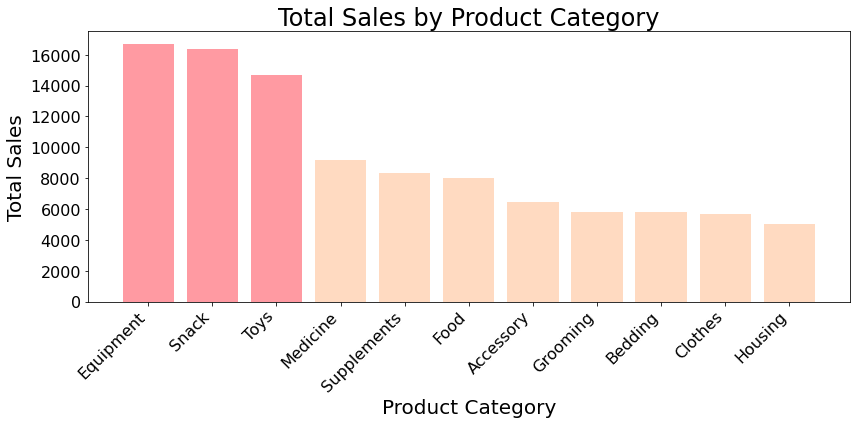

In [6]:
# 用長條圖呈現商品種類的總銷售量排名
plt.figure(figsize=(12, 6))

# 將前3名與其他名次定義為不同顏色
target_index = [0,1,2]
target_color = '#ff9aa2'
other_color = '#ffdac1'
colors = [target_color if i in target_index else other_color for i in range(len(sales_by_category))]
plt.bar(sales_by_category['Product Category'], sales_by_category['Total Sales'], color=colors)

plt.title('Total Sales by Product Category', fontsize=24)
plt.xlabel('Product Category', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)

plt.xticks(rotation=45, ha='right',fontsize=16)  # 旋轉 x 軸標籤以避免重疊
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

### 由長條圖可得知，Equipment、Snack、Toys 這 3 種商品的銷量最好，再來進一步看這些種類的銷售量是否與寵物種類、寵物體型大小相關	

## 2-1. 銷售量 Top 3 商品種類的銷售分析

In [7]:
#取出Equipment、Snack、Toys這三種類別的寵物種類、寵物體型大小、銷售量、產品售價、是否回購
top_3_sales = pet_store.loc[pet_store['product_category'].isin(['Equipment','Snack','Toys']),['product_id', 'product_category', 'pet_type','pet_size','sales','price','re_buy']].reset_index(drop = True)
top_3_sales

,product_id,product_category,pet_type,pet_size,sales,price,re_buy
0,5040,Equipment,fish,small,123,7293,1
1,4567,Toys,cat,small,61,9304,0
2,4237,Toys,hamster,small,218,8180,0
3,4364,Snack,dog,large,69,18559,1
4,4380,Toys,dog,extra_small,79,13519,0
...,...,...,...,...,...,...,...
418,4343,Equipment,cat,medium,212,9988,1
419,4999,Snack,bird,medium,27,11302,0
420,4243,Snack,hamster,medium,76,13390,0
421,4783,Snack,cat,medium,162,17240,1


In [8]:
#先以寵物類別進行分組，計算每一組的銷售總量
top_3_sales_by_pet_type = top_3_sales.groupby(['pet_type'])['sales'].sum().sort_values(ascending=False)
top_3_sales_by_pet_type = pd.DataFrame(top_3_sales_by_pet_type).reset_index()
top_3_sales_by_pet_type

,pet_type,sales
0,cat,16974
1,dog,16874
2,fish,6534
3,bird,6083
4,rabbit,749
5,hamster,560


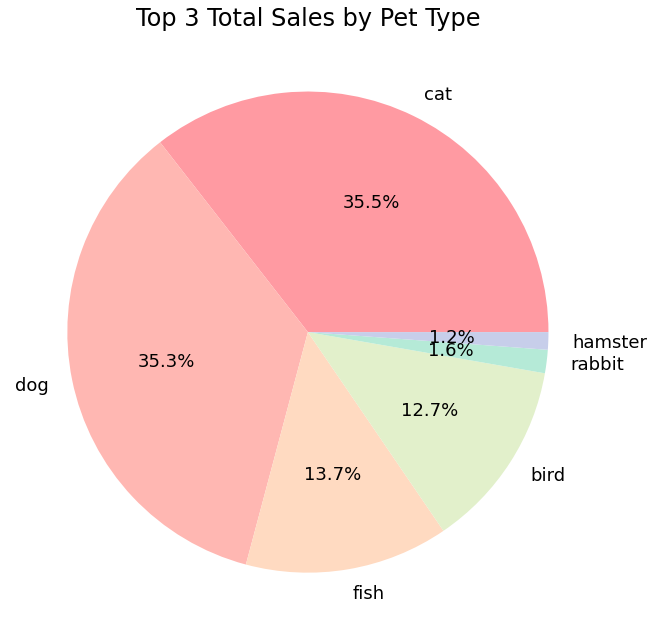

In [9]:
#將結果製作圓餅圖，看看每個寵物種類的銷售量佔比

# 設定圖的大小
plt.figure(figsize=(12, 9))

colors = ['#ff9aa2', '#ffb7b2', '#ffdac1', 
          '#e2f0cb', '#b5ead7', '#c7ceea']

plt.pie(top_3_sales_by_pet_type['sales'], labels=top_3_sales_by_pet_type['pet_type'], autopct='%1.1f%%', 
        colors=colors, textprops={'fontsize': 18})
plt.title('Top 3 Total Sales by Pet Type', fontsize=24)

plt.tight_layout()
plt.show()

### 由上圖可以得知貓、狗的銷售量佔 70.8%，是前三名商品種類最大宗。接下來再加入寵物體型大小的維度進行分析。

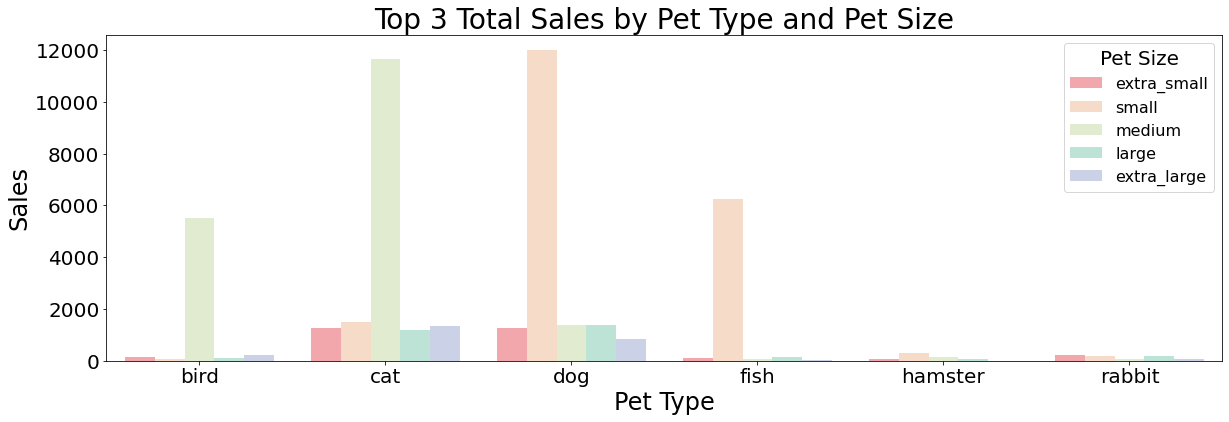

In [10]:
# 使用 groupby 函數根據 pet_type 和 pet_size 分組，並計算每個分組的銷售量
top_3_sales_by_pet_size = top_3_sales.groupby(['pet_type', 'pet_size'])['sales'].sum().reset_index()
colors = ['#ff9aa2', '#ffdac1', '#e2f0cb', '#b5ead7', '#c7ceea']

# 使用 Seaborn 繪製堆疊長條圖
plt.figure(figsize=(20, 6))
sns.barplot(x='pet_type', y='sales', hue='pet_size', data=top_3_sales_by_pet_size, 
            hue_order=['extra_small', 'small', 'medium', 'large', 'extra_large'],
            palette=colors, width=0.8)
plt.xlabel('Pet Type', fontsize= 24)
plt.ylabel('Sales', fontsize= 24)

plt.title('Top 3 Total Sales by Pet Type and Pet Size', fontsize=28)
plt.legend(title='Pet Size', title_fontsize = 20, fontsize=16)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

### 加入寵物體型大小後，可以看到小型犬的銷售量是最多的，其次是中型貓，兩者皆超過10,000；另，小型魚、中型鳥也分別有 6,000 左右的銷售量

## 2-2. Equipment、Snack、Toys 分別的銷售量分析

In [11]:
equipment_df = top_3_sales.loc[top_3_sales['product_category'] == 'Equipment',['product_category','pet_type','pet_size','sales','price']].reset_index(drop = True)
equipment_df = equipment_df.groupby(['product_category', 'pet_type','pet_size'])['sales'].sum().sort_values(ascending=False)
equipment_df = pd.DataFrame(equipment_df).reset_index()
equipment_df = equipment_df.head(5)
equipment_df

,product_category,pet_type,pet_size,sales
0,Equipment,dog,small,3993
1,Equipment,cat,medium,3905
2,Equipment,fish,small,2175
3,Equipment,bird,medium,1878
4,Equipment,cat,extra_large,676


In [12]:
snack_df = top_3_sales.loc[top_3_sales['product_category'] == 'Snack',['product_category', 'pet_type','pet_size','sales','price']].reset_index(drop = True)
snack_df = snack_df.groupby(['product_category', 'pet_type','pet_size'])['sales'].sum().sort_values(ascending=False)
snack_df = pd.DataFrame(snack_df).reset_index()
snack_df = snack_df.head(5)
snack_df

,product_category,pet_type,pet_size,sales
0,Snack,dog,small,4293
1,Snack,cat,medium,3798
2,Snack,bird,medium,2037
3,Snack,fish,small,1977
4,Snack,cat,small,758


In [13]:
toys_df = top_3_sales.loc[top_3_sales['product_category'] == 'Toys',['product_category', 'pet_type','pet_size','sales','price']].reset_index(drop = True)
toys_df = toys_df.groupby(['product_category', 'pet_type','pet_size'])['sales'].sum().sort_values(ascending=False)
toys_df = pd.DataFrame(toys_df).reset_index()
toys_df = toys_df.head(5)
toys_df

,product_category,pet_type,pet_size,sales
0,Toys,cat,medium,3960
1,Toys,dog,small,3703
2,Toys,fish,small,2077
3,Toys,bird,medium,1609
4,Toys,cat,extra_small,540


In [14]:
top_5_summary = pd.concat([equipment_df, snack_df, toys_df], axis = 1)
top_5_summary

,product_category,pet_type,pet_size,sales,product_category,pet_type,pet_size,sales,product_category,pet_type,pet_size,sales
0,Equipment,dog,small,3993,Snack,dog,small,4293,Toys,cat,medium,3960
1,Equipment,cat,medium,3905,Snack,cat,medium,3798,Toys,dog,small,3703
2,Equipment,fish,small,2175,Snack,bird,medium,2037,Toys,fish,small,2077
3,Equipment,bird,medium,1878,Snack,fish,small,1977,Toys,bird,medium,1609
4,Equipment,cat,extra_large,676,Snack,cat,small,758,Toys,cat,extra_small,540


### 雖然整體而言小型犬的銷售量表現是最好的，但在 Toys 這個商品類別，中型貓的銷售量是最高的；另外一點值得一提的是，三個商品類別貓都在前 5 名佔了兩個席次，且以中小型的貓為主。

## 2-3. Equipment、Snack、Toys 分別銷售量 Top 1 的類別回購狀況分析

In [15]:
#查看Equipment中銷售第一名的類型「小型犬」，銷售前10的商品回購狀況
equipment_rebuy = top_3_sales.loc[(top_3_sales['product_category'] == 'Equipment') 
                                  & (top_3_sales['pet_type'] == 'dog')
                                  & (top_3_sales['pet_size'] == 'small')
                                  ,['product_id','pet_type','pet_size','sales','price','re_buy']].reset_index(drop = True)
equipment_rebuy = equipment_rebuy.sort_values(by=['sales'], ascending=False, ignore_index=True)
equipment_rebuy_top10 = equipment_rebuy.head(10)
equipment_rebuy_top10

,product_id,pet_type,pet_size,sales,price,re_buy
0,4836,dog,small,217,18681,1
1,4932,dog,small,213,310,0
2,4332,dog,small,203,4002,1
3,4842,dog,small,199,1119,1
4,4860,dog,small,191,1343,1
5,4890,dog,small,182,13313,0
6,4956,dog,small,173,945,0
7,4776,dog,small,170,18115,1
8,4938,dog,small,162,10668,0
9,4442,dog,small,150,8437,0


In [16]:
#查看Snack中銷售第一名的類型「小型犬」，銷售前10的商品回購狀況
snack_rebuy = top_3_sales.loc[(top_3_sales['product_category'] == 'Snack') 
                                  & (top_3_sales['pet_type'] == 'dog')
                                  & (top_3_sales['pet_size'] == 'small')
                                  ,['product_id','pet_type','pet_size','sales','price','re_buy']].reset_index(drop = True)
snack_rebuy = snack_rebuy.sort_values(by=['sales'], ascending=False, ignore_index=True)
snack_rebuy_top10 = snack_rebuy.head(10)
snack_rebuy_top10

,product_id,pet_type,pet_size,sales,price,re_buy
0,4948,dog,small,221,7250,0
1,4792,dog,small,217,1613,0
2,4232,dog,small,208,14869,1
3,4804,dog,small,203,14903,1
4,4816,dog,small,189,5454,1
5,4774,dog,small,181,4041,0
6,4342,dog,small,179,11474,1
7,4912,dog,small,177,11837,0
8,4900,dog,small,168,18341,0
9,4858,dog,small,166,6622,1


In [17]:
#查看Snack中銷售第一名的類型「小型犬」，銷售前10的商品回購狀況
toys_rebuy = top_3_sales.loc[(top_3_sales['product_category'] == 'Toys') 
                                  & (top_3_sales['pet_type'] == 'cat')
                                  & (top_3_sales['pet_size'] == 'medium')
                                  ,['product_id','pet_type','pet_size','sales','price','re_buy']].reset_index(drop = True)
toys_rebuy = toys_rebuy.sort_values(by=['sales'], ascending=False, ignore_index=True)
toys_rebuy_top10 = toys_rebuy.head(10)
toys_rebuy_top10

,product_id,pet_type,pet_size,sales,price,re_buy
0,4931,cat,medium,226,1985,0
1,4865,cat,medium,223,13760,1
2,4859,cat,medium,220,18472,1
3,4949,cat,medium,217,791,0
4,4913,cat,medium,213,13402,0
5,4877,cat,medium,194,3609,0
6,4925,cat,medium,189,2328,0
7,4799,cat,medium,184,13022,1
8,4829,cat,medium,177,5355,1
9,4781,cat,medium,172,8367,0


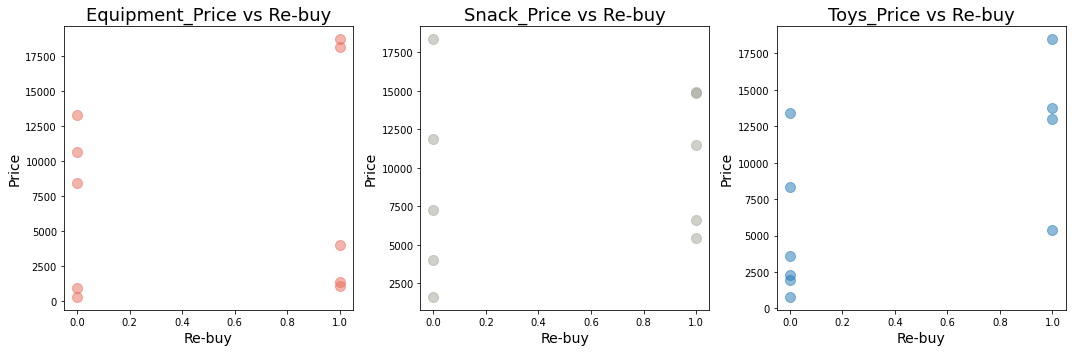

In [18]:
# 創建包含三個子圖的畫布
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 第一個散佈圖：Equipment_Price vs Re-buy
axs[0].scatter(equipment_rebuy_top10['re_buy'], equipment_rebuy_top10['price'], s=100, alpha=0.5, color = '#e86a58')
axs[0].set_title('Equipment_Price vs Re-buy', fontsize=18)
axs[0].set_xlabel('Re-buy', fontsize=14)
axs[0].set_ylabel('Price', fontsize=14)

# 第二個散佈圖：Snack_Price vs Re-buy
axs[1].scatter(snack_rebuy_top10['re_buy'], snack_rebuy_top10['price'], s=100, alpha=0.5, color = '#a3a398')
axs[1].set_title('Snack_Price vs Re-buy', fontsize=18)
axs[1].set_xlabel('Re-buy', fontsize=14)
axs[1].set_ylabel('Price', fontsize=14)

# 繪製第三個散佈圖：Toys_Price vs Re-buy
axs[2].scatter(toys_rebuy_top10['re_buy'], toys_rebuy_top10['price'], s=100, alpha=0.5)
axs[2].set_title('Toys_Price vs Re-buy', fontsize=18)
axs[2].set_xlabel('Re-buy', fontsize=14)
axs[2].set_ylabel('Price', fontsize=14)

# 顯示圖表
plt.tight_layout()
plt.show()

### 由上圖可以看出商品價格對於回購行為的影響並不顯著，不過在Equipment和Toys這兩個類別，最高售價的商品都有回購的行為，有可能是高價的商品品質佳，因此顧客有回購意願。

# 3. 評價較好的商品是否銷量較好？

In [19]:
pet_rating = pet_store[['rating','sales','price','re_buy']]
pet_rating = pet_rating.groupby(['rating'])['sales'].sum()
pet_rating = pd.DataFrame(pet_rating).reset_index().sort_values(by=['rating'], ascending=False)
pet_rating

,rating,sales
9,10,26146
8,9,4871
7,8,5128
6,7,14142
5,6,24147
4,5,4662
3,4,4138
2,3,4473
1,2,6934
0,1,7406


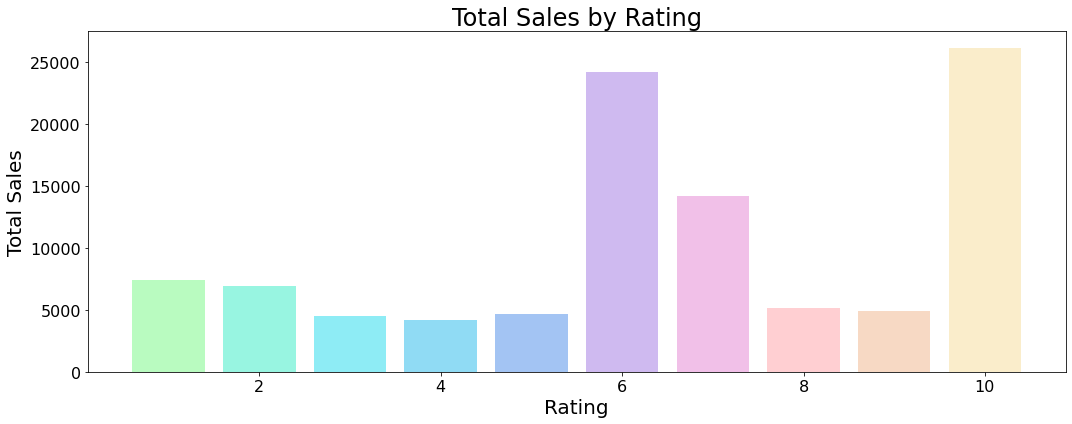

In [20]:
# 用長條圖呈現以評分分組後的銷售量
plt.figure(figsize=(15, 6))

colors = ['#faedcb','#f7d9c4','#ffcfd2','#f1c0e8','#cfbaf0','#a3c4f3','#90dbf4','#8eecf5','#98f5e1','#b9fbc0']
plt.bar(pet_rating['rating'], pet_rating['sales'], color=colors)

plt.title('Total Sales by Rating', fontsize=24)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

### 評分10分的商品銷售量確實最高，但評分6分、7分的商品銷售量分別位居第二、三，因此評價與銷量並無顯著正相關。

## 3.1 比較銷售量最佳的兩組(評價10分和6分)的商品售價情況

In [21]:
pet_rating_10 = pet_store.loc[pet_store['rating'] == 10 ,['price','re_buy']].reset_index(drop = True)
pet_rating_10['price'].describe()

count      222.000000
mean     10553.657658
std       5289.543905
min        499.000000
25%       6119.500000
50%      10367.500000
75%      15198.500000
max      19438.000000
Name: price, dtype: float64

In [22]:
pet_rating_6 = pet_store.loc[pet_store['rating'] == 6 ,['price','re_buy']].reset_index(drop = True)
pet_rating_6['price'].describe()

count      213.000000
mean      9550.070423
std       5792.552665
min        175.000000
25%       4370.000000
50%       9258.000000
75%      14435.000000
max      19427.000000
Name: price, dtype: float64

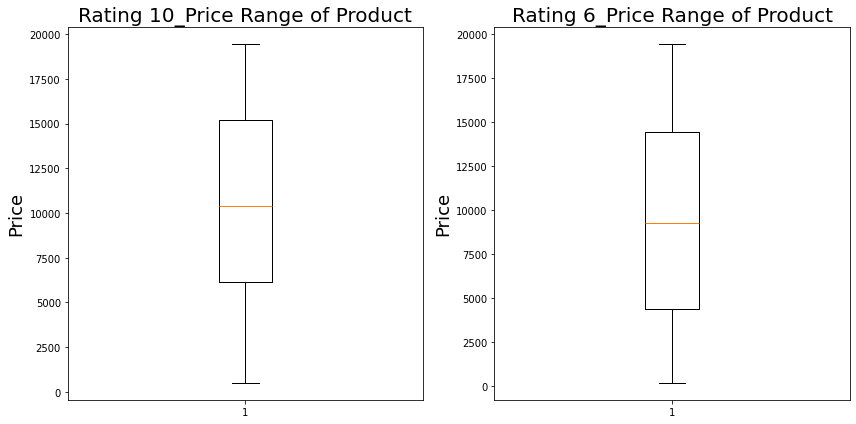

In [23]:
# 繪製兩個盒鬚圖
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(pet_rating_10['price'])
plt.title('Rating 10_Price Range of Product', fontsize=20)
plt.ylabel('Price', fontsize=18)

plt.subplot(1, 2, 2)
plt.boxplot(pet_rating_6['price'])
plt.title('Rating 6_Price Range of Product', fontsize=20)
plt.ylabel('Price', fontsize=18)

plt.tight_layout()
plt.show()

### 評分10分的商品售價最小值是評分6分的商品售價最小值的2.85倍，但評分10分的商品售價與6分的商品售價最大值非常接近，分別為19438、19427，兩者商品售價平均數、中位數差異也不大，故推論評價與售價並無正相關。

## 3.2 比較銷售量最佳的兩組(評價10分和6分)的商品回購比率

In [24]:
print('評價10分的商品數為：'+str(pet_rating_10['re_buy'].count())+'\n'+'評價10分的回購率為：'+ str(pet_rating_10['re_buy'].mean()))
print('評價6分的商品數為：'+str(pet_rating_6['re_buy'].count())+'\n''評價6分的回購率為：'+ str(pet_rating_6['re_buy'].mean()))

評價10分的商品數為：222
評價10分的回購率為：0.5045045045045045
評價6分的商品數為：213
評價6分的回購率為：0.215962441314554


### 評分10分的商品較評分6分的商品多，且回購率也較6分的商品表現更好達到5成，可初步推論評論分數高低與回購率成正相關。